**Load data with Pandas**

Let's start by examining a dataset that contains observations of multiple classes. We'll use a dataset that contains observations of three different species of penguin.

In [1]:
# load the training dataset
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/penguins.csv

--2023-08-24 08:55:11--  https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/penguins.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7086 (6.9K) [text/plain]
Saving to: ‘penguins.csv’

penguins.csv        100%[===================>]   6.92K  --.-KB/s    in 0s      

2023-08-24 08:55:11 (14.2 MB/s) - ‘penguins.csv’ saved [7086/7086]



In [3]:
import pandas as pd

penguins = pd.read_csv('penguins.csv')

# Display a random sample of 20 observations
sample = penguins.sample(20)
sample

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
22,35.9,19.2,189.0,3800.0,0
120,36.2,17.2,187.0,3150.0,0
66,35.5,16.2,195.0,3350.0,0
50,39.6,17.7,186.0,3500.0,0
245,49.5,16.1,224.0,5650.0,1
294,46.4,18.6,190.0,3450.0,2
191,48.7,15.7,208.0,5350.0,1
235,50.0,15.9,224.0,5350.0,1
176,42.9,13.1,215.0,5000.0,1
68,35.9,16.6,190.0,3050.0,0


The dataset contains the following columns:
* **CulmenLength**: The length in mm of the penguin's culmen (bill).
* **CulmenDepth**: The depth in mm of the penguin's culmen.
* **FlipperLength**: The length in mm of the penguin's flipper.
* **BodyMass**: The body mass of the penguin in grams.
* **Species**: An integer value that represents the species of the penguin.

The **Species** column is the label we want to train a model to predict. The dataset includes three possible species, which are encoded as 0, 1, and 2. The actual species names are revealed by the code below:

In [7]:
penguin_classes = ['Adelie', 'Gentoo', 'Chinstrap']
print(sample.columns[0:5].values, 'SpeciesName')
for index, row in penguins.sample(10).iterrows():
    print('[',row[0], row[1], row[2], row[3], int(row[4]),']',penguin_classes[int(row[4])])

['CulmenLength' 'CulmenDepth' 'FlipperLength' 'BodyMass' 'Species'] SpeciesName
[ 50.0 15.9 224.0 5350.0 1 ] Gentoo
[ 40.9 18.9 184.0 3900.0 0 ] Adelie
[ 45.3 13.8 208.0 4200.0 1 ] Gentoo
[ 43.3 14.0 208.0 4575.0 1 ] Gentoo
[ 39.0 17.1 191.0 3050.0 0 ] Adelie
[ 38.3 19.2 189.0 3950.0 0 ] Adelie
[ 41.3 21.1 195.0 4400.0 0 ] Adelie
[ 45.2 13.8 215.0 4750.0 1 ] Gentoo
[ 48.5 15.0 219.0 4850.0 1 ] Gentoo
[ 52.7 19.8 197.0 3725.0 2 ] Chinstrap


In [4]:
# Count the number of null values for each column
penguins.isnull().sum()

CulmenLength     2
CulmenDepth      2
FlipperLength    2
BodyMass         2
Species          0
dtype: int64

In [5]:
# Show rows containing nulls
penguins[penguins.isnull().any(axis=1)]

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
3,NaN,NaN,NaN,NaN,0
271,NaN,NaN,NaN,NaN,1


In [6]:
# Drop rows containing NaN values
penguins=penguins.dropna()
#Confirm there are now no nulls
penguins.isnull().sum()

CulmenLength     0
CulmenDepth      0
FlipperLength    0
BodyMass         0
Species          0
dtype: int64

Now that we've dealt with the missing values, let's explore how the features relate to the label by creating some box charts.

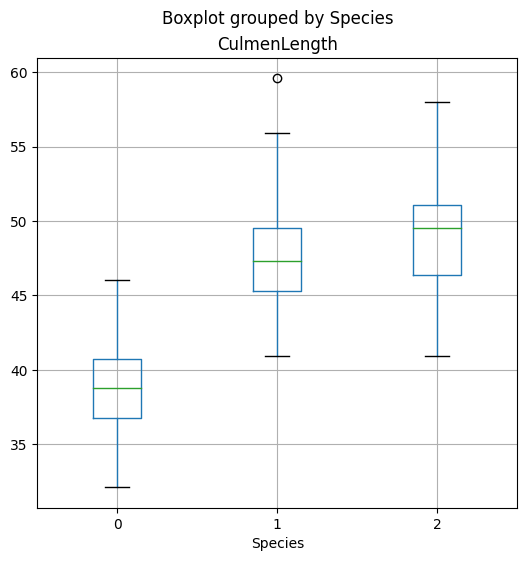

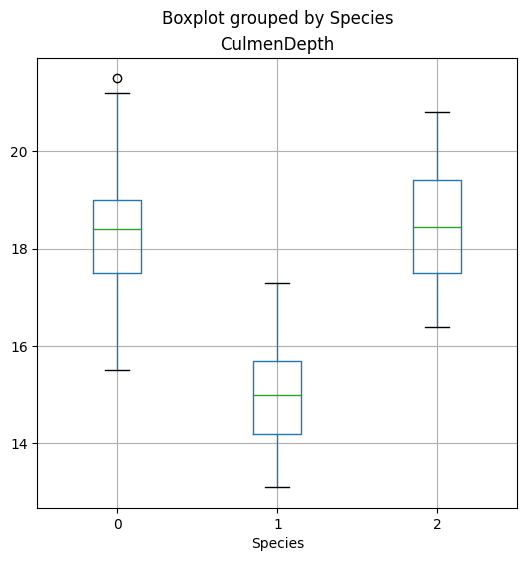

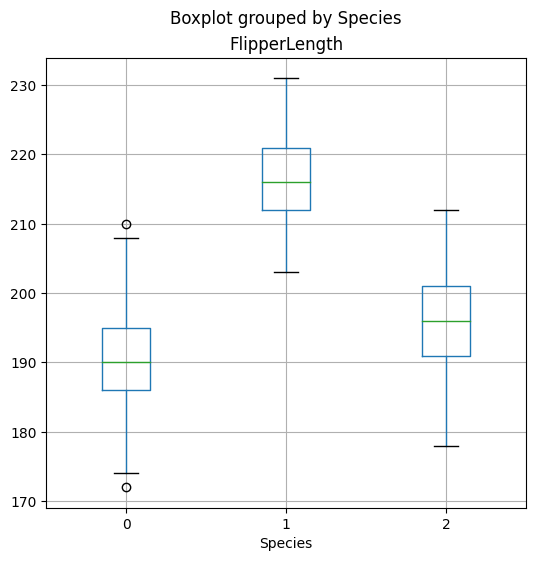

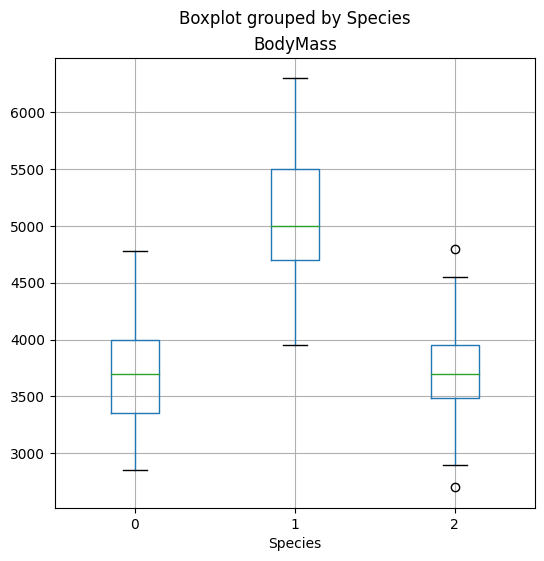

In [8]:
from matplotlib import pyplot as plt
%matplotlib inline

penguin_features = ['CulmenLength','CulmenDepth','FlipperLength','BodyMass']
penguin_label = 'Species'
for col in penguin_features:
    penguins.boxplot(column=col, by=penguin_label, figsize=(6,6))
    plt.title(col)
plt.show()

From the box plots, it looks like species 0 and 2 (Adelie and Chinstrap) have similar data profiles for culmen depth, flipper length, and body mass, but Chinstraps tend to have longer culmens. Species 1 (Gentoo) tends to have fairly clearly differentiated features from the others; which should help us train a good classification model.

In [9]:
from sklearn.model_selection import train_test_split

# Separate features and labels
penguins_X, penguins_y = penguins[penguin_features].values, penguins[penguin_label].values

# Split data 70%-30% into training set and test set
x_penguin_train, x_penguin_test, y_penguin_train, y_penguin_test = train_test_split(penguins_X, penguins_y,
                                                                                    test_size=0.30,
                                                                                    random_state=0,
                                                                                    stratify=penguins_y)

print ('Training Set: %d, Test Set: %d \n' % (x_penguin_train.shape[0], x_penguin_test.shape[0]))

Training Set: 239, Test Set: 103 



### Train and evaluate a multiclass classifier

Now that we have a set of training features and corresponding training labels, we can fit a multiclass classification algorithm to the data to create a model. Most scikit-learn classification algorithms inherently support multiclass classification. We'll try a logistic regression algorithm.

In [10]:
from sklearn.linear_model import LogisticRegression

# Set regularization rate
reg = 0.1

# train a logistic regression model on the training set
multi_model = LogisticRegression(C=1/reg, solver='lbfgs', multi_class='auto', max_iter=10000).fit(x_penguin_train, y_penguin_train)
print (multi_model)

LogisticRegression(C=10.0, max_iter=10000)


Now we can use the trained model to predict the labels for the test features, and compare the predicted labels to the actual labels:

In [11]:
penguin_predictions = multi_model.predict(x_penguin_test)
print('Predicted labels: ', penguin_predictions[:15])
print('Actual labels   : ' ,y_penguin_test[:15])

Predicted labels:  [0 1 0 2 2 1 1 1 0 2 2 1 2 1 2]
Actual labels   :  [0 1 2 2 2 1 1 1 0 2 2 1 2 1 2]


Let's look at a classification report

In [77]:
from sklearn. metrics import classification_report

print(classification_report(y_penguin_test, penguin_predictions))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        45
           1       1.00      1.00      1.00        37
           2       0.95      0.90      0.93        21

    accuracy                           0.97       103
   macro avg       0.97      0.96      0.96       103
weighted avg       0.97      0.97      0.97       103



As with binary classification, the report includes *precision* and *recall* metrics for each class. However, while with binary classification we could focus on the scores for the *positive* class; in this case, there are multiple classes so we need to look at an overall metric (either the macro or weighted average) to get a sense of how well the model performs across all three classes.

You can get the overall metrics separately from the report using the scikit-learn metrics score classes, but with multiclass results you must specify which average metric you want to use for precision and recall.

In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print("Overall Accuracy:",accuracy_score(y_penguin_test, penguin_predictions))
print("Overall Precision:",precision_score(y_penguin_test, penguin_predictions, average='macro'))
print("Overall Recall:",recall_score(y_penguin_test, penguin_predictions, average='macro'))

Overall Accuracy: 0.970873786407767
Overall Precision: 0.9688405797101449
Overall Recall: 0.9608465608465608


Now let's look at the confusion matrix for our model:

In [13]:
from sklearn.metrics import confusion_matrix

# Print the confusion matrix
mcm = confusion_matrix(y_penguin_test, penguin_predictions)
print(mcm)

[[44  0  1]
 [ 0 37  0]
 [ 2  0 19]]


The confusion matrix shows the intersection of predicted and actual label values for each class - in simple terms, the diagonal intersections from top-left to bottom-right indicate the number of correct predictions.

When dealing with multiple classes, it's generally more intuitive to visualize this as a heat map, like this:

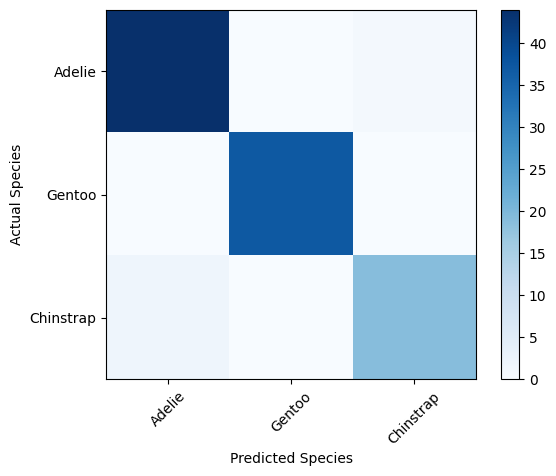

In [14]:
import numpy as np

plt.imshow(mcm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(penguin_classes))
plt.xticks(tick_marks, penguin_classes, rotation=45)
plt.yticks(tick_marks, penguin_classes)
plt.xlabel("Predicted Species")
plt.ylabel("Actual Species")
plt.show()

The darker squares in the confusion matrix plot indicate high numbers of cases, and you can hopefully see a diagonal line of darker squares indicating cases where the predicted and actual label are the same.

In the case of a multiclass classification model, a single ROC curve showing true positive rate vs false positive rate is not possible. However, you can use the rates for each class in a One vs Rest (OVR) comparison to create a ROC chart for each class.

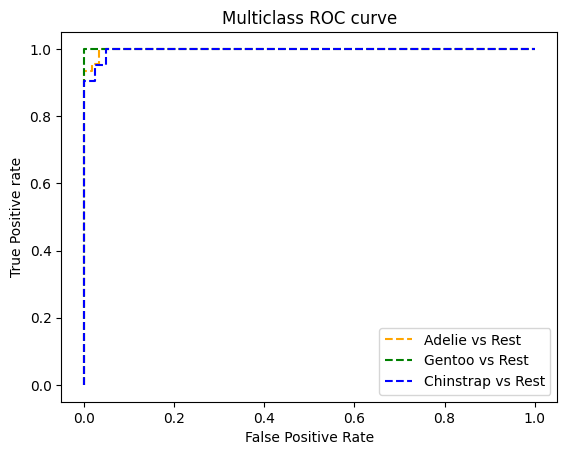

In [15]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Get class probability scores
penguin_prob = multi_model.predict_proba(x_penguin_test)

# Get ROC metrics for each class
fpr = {}
tpr = {}
thresh ={}
for i in range(len(penguin_classes)):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_penguin_test, penguin_prob[:,i], pos_label=i)

# Plot the ROC chart
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label=penguin_classes[0] + ' vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label=penguin_classes[1] + ' vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label=penguin_classes[2] + ' vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

To quantify the ROC performance, you can calculate an aggregate area under the curve score that is averaged across all of the OVR curves.

In [16]:
auc = roc_auc_score(y_penguin_test,penguin_prob, multi_class='ovr')
print('Average AUC:', auc)

Average AUC: 0.9981999902100828


### Train and evaluate a decision tree

In [73]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(x_penguin_train, y_penguin_train)

DecisionTreeClassifier()

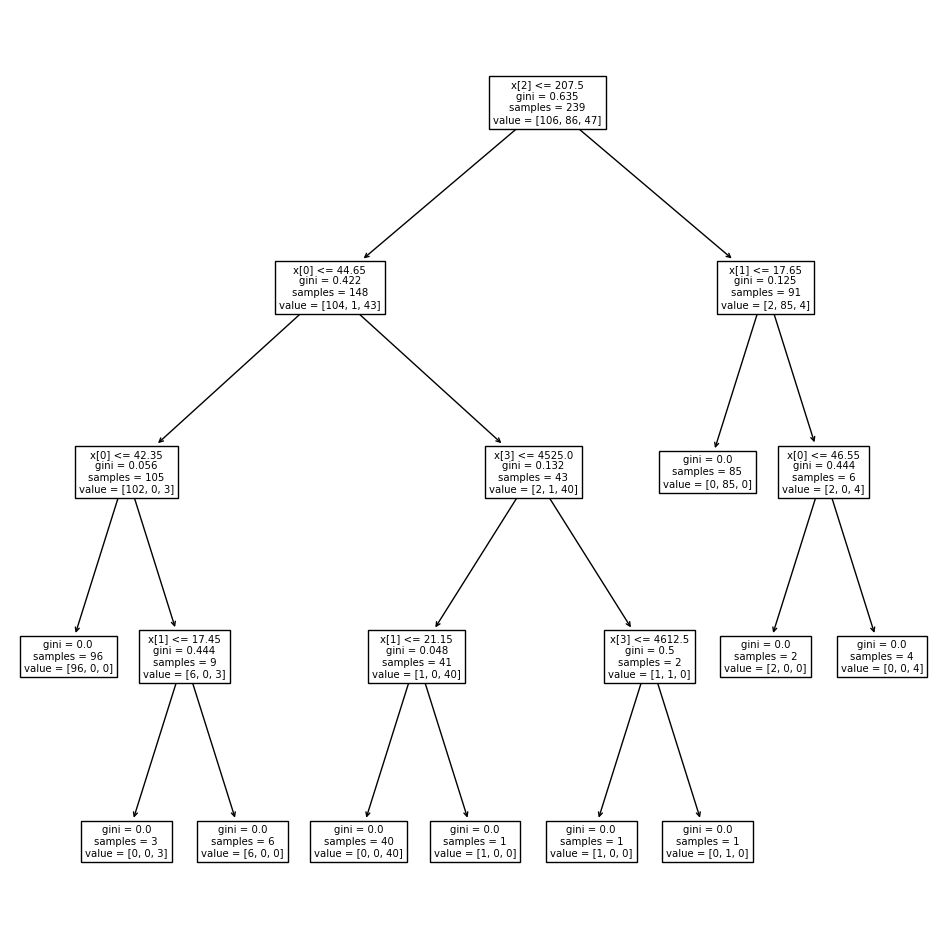

In [94]:
from sklearn.tree import plot_tree
plt.figure(figsize=(12,12))
plot_tree(dtree, max_depth=4)
plt.show()

In [75]:
penguin_predictions_tree = dtree.predict(x_penguin_test)

print('Predicted labels: ', penguin_predictions_tree[:15])
print('Actual labels   : ' ,y_penguin_test[:15])

Predicted labels:  [0 1 0 2 2 1 1 1 0 2 2 1 2 1 2]
Actual labels   :  [0 1 2 2 2 1 1 1 0 2 2 1 2 1 2]


In [78]:
print(classification_report(y_penguin_test, penguin_predictions_tree))
print("Overall Accuracy:",accuracy_score(y_penguin_test, penguin_predictions_tree))
print("Overall Precision:",precision_score(y_penguin_test, penguin_predictions_tree, average='macro'))
print("Overall Recall:",recall_score(y_penguin_test, penguin_predictions_tree, average='macro'))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96        45
           1       1.00      1.00      1.00        37
           2       0.95      0.86      0.90        21

    accuracy                           0.96       103
   macro avg       0.96      0.94      0.95       103
weighted avg       0.96      0.96      0.96       103

Overall Accuracy: 0.9611650485436893
Overall Precision: 0.9611795446061963
Overall Recall: 0.944973544973545


[[44  0  1]
 [ 0 37  0]
 [ 3  0 18]]


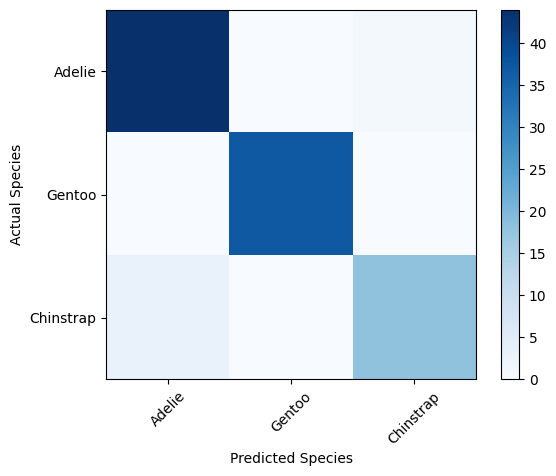

In [79]:
# Print the confusion matrix
mcm_tree = confusion_matrix(y_penguin_test, penguin_predictions_tree)
print(mcm_tree)


plt.imshow(mcm_tree, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(penguin_classes))
plt.xticks(tick_marks, penguin_classes, rotation=45)
plt.yticks(tick_marks, penguin_classes)
plt.xlabel("Predicted Species")
plt.ylabel("Actual Species")
plt.show()

### Train and evaluate a Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(x_penguin_train, y_penguin_train)

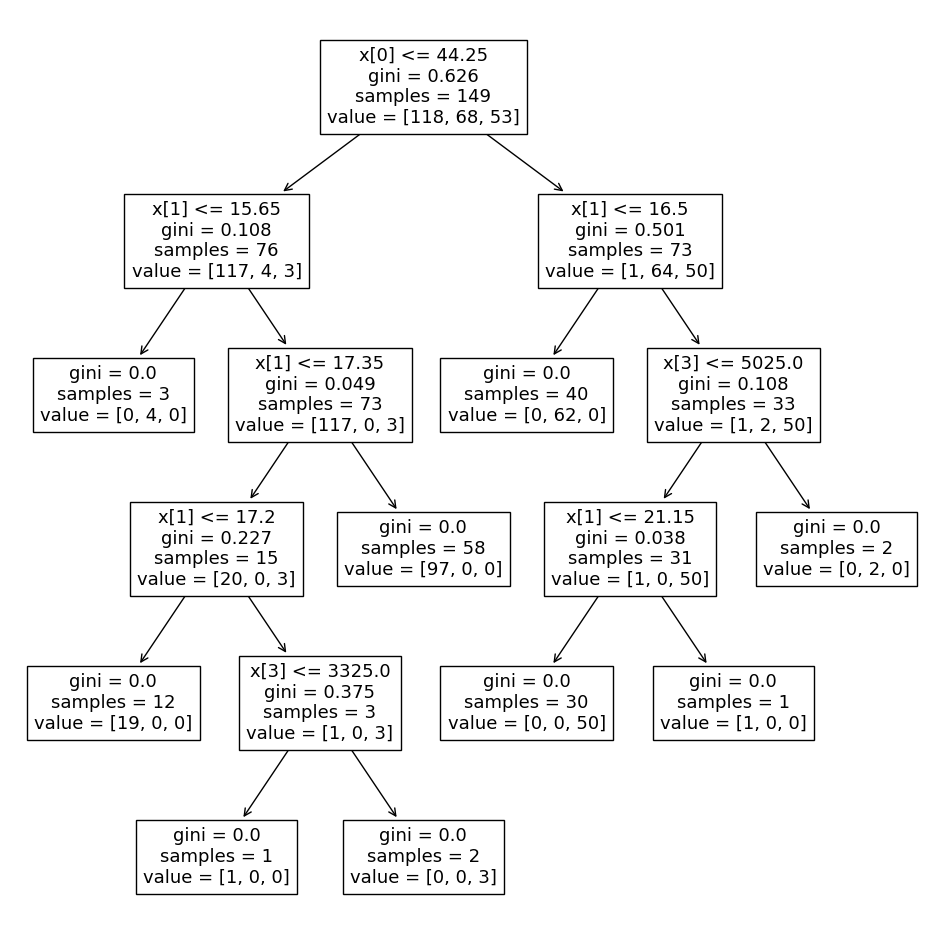

In [93]:
from sklearn.tree import plot_tree
plt.figure(figsize=(12,12))
plot_tree(rfc.estimators_[4])
plt.show()

In [81]:
penguin_predictions_rfc = rfc.predict(x_penguin_test)

print('Predicted labels: ', penguin_predictions_rfc[:15])
print('Actual labels   : ' ,y_penguin_test[:15])

Predicted labels:  [0 1 0 2 2 1 1 1 0 2 2 1 2 1 2]
Actual labels   :  [0 1 2 2 2 1 1 1 0 2 2 1 2 1 2]


In [82]:
print(classification_report(y_penguin_test, penguin_predictions_rfc))
print("Overall Accuracy:",accuracy_score(y_penguin_test, penguin_predictions_rfc))
print("Overall Precision:",precision_score(y_penguin_test, penguin_predictions_rfc, average='macro'))
print("Overall Recall:",recall_score(y_penguin_test, penguin_predictions_rfc, average='macro'))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        45
           1       1.00      1.00      1.00        37
           2       0.95      0.90      0.93        21

    accuracy                           0.97       103
   macro avg       0.97      0.96      0.96       103
weighted avg       0.97      0.97      0.97       103

Overall Accuracy: 0.970873786407767
Overall Precision: 0.9688405797101449
Overall Recall: 0.9608465608465608


[[44  0  1]
 [ 0 37  0]
 [ 2  0 19]]


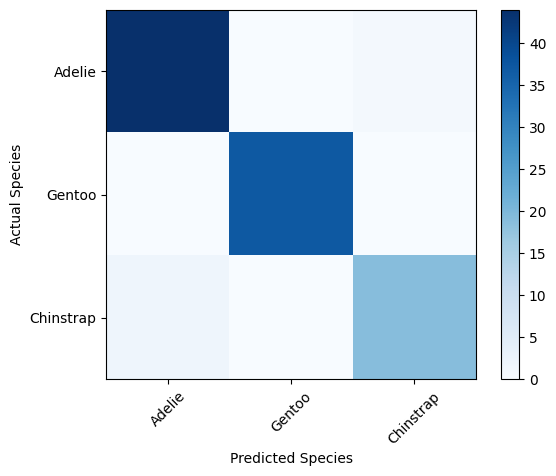

In [83]:
# Print the confusion matrix
mcm_rfc = confusion_matrix(y_penguin_test, penguin_predictions_rfc)
print(mcm_rfc)


plt.imshow(mcm_rfc, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(penguin_classes))
plt.xticks(tick_marks, penguin_classes, rotation=45)
plt.yticks(tick_marks, penguin_classes)
plt.xlabel("Predicted Species")
plt.ylabel("Actual Species")
plt.show()

### Train and evaluate a clustering

In [18]:
penguins.head()

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
0,39.1,18.7,181.0,3750.0,0
1,39.5,17.4,186.0,3800.0,0
2,40.3,18.0,195.0,3250.0,0
4,36.7,19.3,193.0,3450.0,0
5,39.3,20.6,190.0,3650.0,0


In [20]:
# Delete the label column , clustering does not need label
# Display a random sample of 10 observations (just the features)
features = penguins[penguins.columns[0:4]]
features.sample(5)

,CulmenLength,CulmenDepth,FlipperLength,BodyMass
304,46.4,17.8,191.0,3700.0
296,42.4,17.3,181.0,3600.0
230,45.2,13.8,215.0,4750.0
56,39.0,17.5,186.0,3550.0
320,50.9,17.9,196.0,3675.0


In [22]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

# Normalize the numeric features so they're on the same scale
scaled_features = MinMaxScaler().fit_transform(features[penguins.columns[0:4]])

# Get two principal components
pca = PCA(n_components=2).fit(scaled_features)
features_2d = pca.transform(scaled_features)
features_2d[0:10]

array([[-0.42106032,  0.00303797],
       [-0.28822919, -0.10630972],
       [-0.2980564 , -0.0474408 ],
       [-0.4061154 ,  0.02199611],
       [-0.43967918,  0.20457649],
       [-0.39540885, -0.09660671],
       [-0.18312462,  0.17063491],
       [-0.37508936, -0.14328578],
       [-0.29175883,  0.2489866 ],
       [-0.37079512, -0.19567099]])

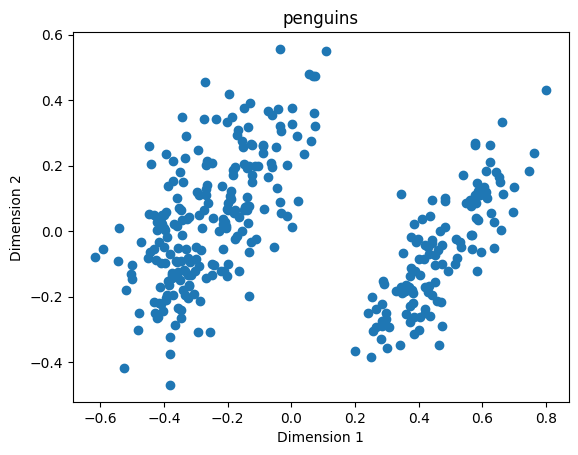

In [23]:
#Now that we have the data points translated to two dimensions, we can visualize them in a plot
import matplotlib.pyplot as plt

%matplotlib inline

plt.scatter(features_2d[:,0],features_2d[:,1])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('penguins')
plt.show()

we can see at least two, arguably three groups of data points; but without known class labels, how do we know how many clusters to separate your data into?

One way we can try to find out is to use a data sample to create a series of clustering models with an incrementing number of clusters, and measure how tightly the data points are grouped within each cluster. A metric often used to measure this tightness is the within cluster sum of squares (WCSS), with lower values meaning that the data points are closer. we can then plot the WCSS for each model.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

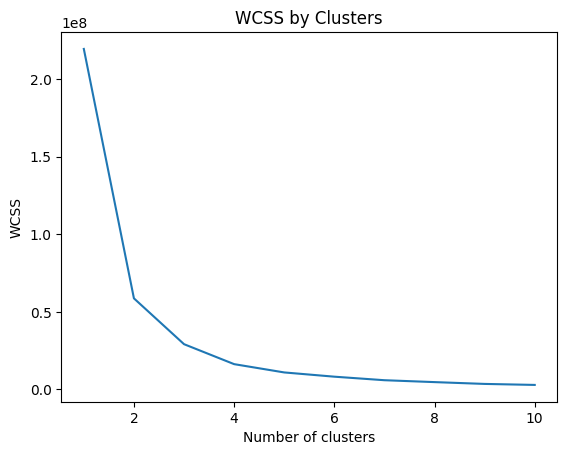

In [24]:
from sklearn.cluster import KMeans

# Create 10 models with 1 to 10 clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i)
    # Fit the data points
    kmeans.fit(features.values)
    # Get the WCSS (inertia) value
    wcss.append(kmeans.inertia_)

#Plot the WCSS values onto a line graph
plt.plot(range(1, 11), wcss)
plt.title('WCSS by Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

The plot shows a large reduction in WCSS (so greater tightness) as the number of clusters increases from one to two, and a further noticable reduction from two to three clusters. After that, the reduction is less pronounced, resulting in an "elbow" in the chart at around three clusters. This is a good indication that there are two to three reasonably well separated clusters of data points.

In [70]:
# Create a model based on 3 centroids
model = KMeans(n_clusters=3, init='random', n_init=200, max_iter=1000)
# Fit to the data and predict the cluster assignments for each data point
km_clusters = model.fit_predict(features.values)
# View the cluster assignments
km_clusters

array([0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0,
       2, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0,
       2, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 1, 2,
       1, 1, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1,
       1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 2, 2, 1, 2, 2,
       1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1,
       1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2,
       1, 2, 1, 2, 1, 2, 2, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0,

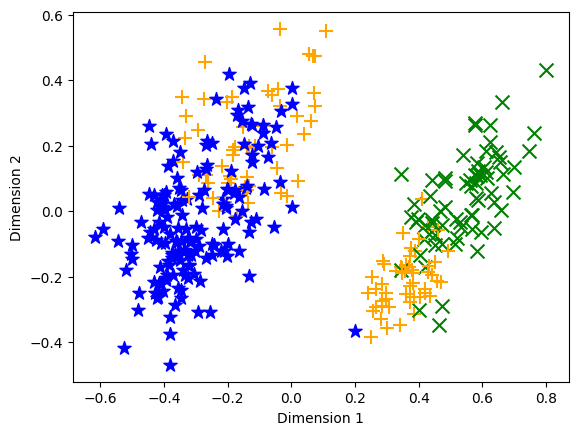

In [71]:
#Let's see those cluster assignments with the two-dimensional data points.

def plot_clusters(samples, clusters):
    col_dic = {0:'blue',1:'green',2:'orange'}
    mrk_dic = {0:'*',1:'x',2:'+'}
    colors = [col_dic[x] for x in clusters]
    markers = [mrk_dic[x] for x in clusters]
    for sample in range(len(clusters)):
        plt.scatter(samples[sample][0], samples[sample][1], color = colors[sample], marker=markers[sample], s=100)
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.show()

plot_clusters(features_2d, km_clusters)

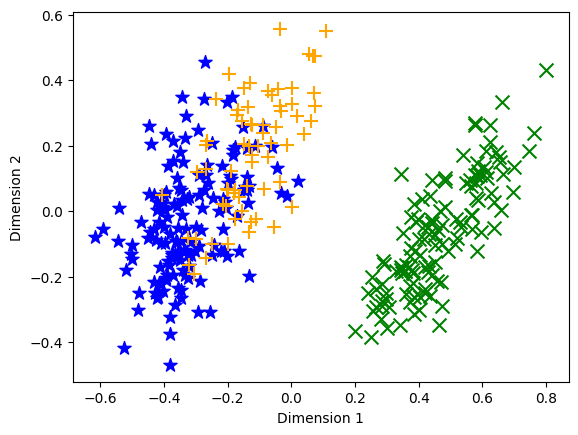

In [72]:
#Actual plot (wrt true label)
plot_clusters(features_2d, penguins[penguin_label].values)